<a href="https://colab.research.google.com/github/adcoh/SOTA/blob/master/sentence_similarities/semantic_similarity_POS_distance_metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd   
import re
import numpy as np
import matplotlib.pyplot as plt
import os   

In [0]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:


!wget https://sota-ydata.s3.amazonaws.com/Paraphrase.csv

--2020-06-09 16:22:53--  https://sota-ydata.s3.amazonaws.com/Paraphrase.csv
Resolving sota-ydata.s3.amazonaws.com (sota-ydata.s3.amazonaws.com)... 52.217.14.100
Connecting to sota-ydata.s3.amazonaws.com (sota-ydata.s3.amazonaws.com)|52.217.14.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44220 (43K) [text/csv]
Saving to: ‘Paraphrase.csv.2’

Paraphrase.csv.2    100%[===================>]  43.18K   244KB/s    in 0.2s    

2020-06-09 16:22:55 (244 KB/s) - ‘Paraphrase.csv.2’ saved [44220/44220]



In [0]:
cd "/content/drive/My Drive/Data Science Course/semester 2/NLP/homework/HW3 - semantic similarity"

/content/drive/My Drive/Data Science Course/semester 2/NLP/homework/HW3 - semantic similarity


In [0]:
data = pd.read_csv("Paraphrase.csv")

In [0]:
data

,text_1,text_2,label
0,take measures in order to,take additional measures to,4.000
1,was seeking to,will strive to,3.000
2,canada aims to,canada works to,2.333
3,refugees and,refugee population,2.667
4,measures and,"instruments , and",3.000
...,...,...,...
993,unless specified otherwise,unless specifically stated otherwise,4.667
994,its efforts to combat,the area of combating,3.667
995,considered by the,give consideration to the,4.333
996,an enlarged security,an expanded security,4.000


#POS Distance metric

 The POS distance denotes the
noun difference between the original and transferred sentences. The smaller the POS distance, the
better the performance. lm here represents language model.

STRUCTURED CONTENT PRESERVATION FOR UNSUPERVISED TEXT STYLE TRANSFER

The link of the paper:
https://arxiv.org/pdf/1810.06526.pdf 


https://github.com/YouzhiTian/Structured-Content-Preservation-for-Unsupervised-Text-Style-Transfer 

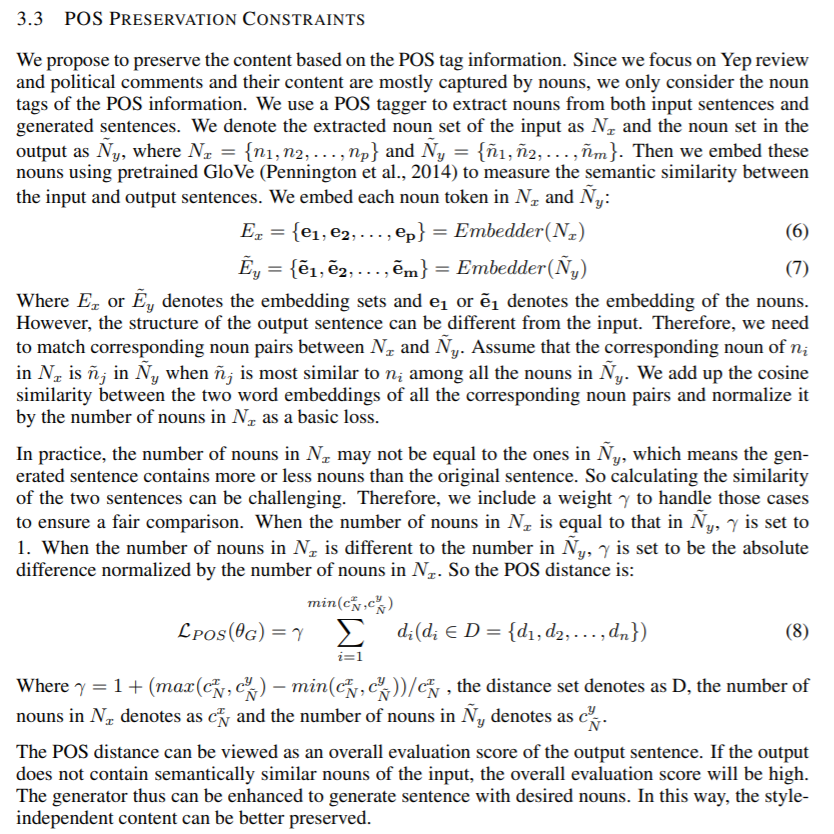

In [0]:
from nltk import pos_tag, word_tokenize
import nltk
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
import torchtext.vocab as torch_vocab
import argparse
import torch

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
dic_glove = torch_vocab.GloVe(name='twitter.27B',dim=100)

try POS distance on one sample

In [0]:
loss_nn_list = []
loss_nn  = 0
count = 0
i = 0
sentence_ori = data.iloc[70]['text_1']
sentence_gen = data.iloc[70]['text_2']
temp_res_ori = pos_tag(word_tokenize(sentence_ori))
temp_res_gen = pos_tag(word_tokenize(sentence_gen))
print(temp_res_ori , temp_res_gen)
temp_nn_ori = []
temp_nn_gen = []
for tube in temp_res_ori:
    if tube[1] == 'NN' or tube[1] == 'NNS':
        temp_nn_ori.append(tube[0])
for tube in temp_res_gen:
    if tube[1] == 'NN' or tube[1] == 'NNS':
        temp_nn_gen.append(tube[0])    

print(temp_nn_ori , temp_nn_gen)

temp_nn_vector_ori = []
temp_nn_vector_gen = []
for word in temp_nn_ori:
    try:
        temp_nn_vector_ori.append(dic_glove.vectors[dic_glove.stoi[word]])
    except KeyError:
        a = 1 
for word in temp_nn_gen:
    try:
        temp_nn_vector_gen.append(dic_glove.vectors[dic_glove.stoi[word]])
    except KeyError:
        a = 1         

# print(temp_nn_vector_ori , temp_nn_vector_gen)

if temp_nn_vector_ori != [] and temp_nn_vector_gen != []:
    loss_list = []
    for vector_target in temp_nn_vector_ori:
        for vector_gen in temp_nn_vector_gen:
            tensor_gen = torch.FloatTensor(vector_gen)
            tensor_target = torch.FloatTensor(vector_target)
            temp_loss = torch.dist(tensor_gen,tensor_target)
            loss_list.append(temp_loss)
    loss_list_new = sorted(loss_list)
    loss_list_new1 = loss_list_new[:min(len(temp_nn_vector_ori),len(temp_nn_vector_gen))]
    loss_nn += (sum(loss_list_new1)/len(loss_list_new1))*(1+abs(len(temp_nn_vector_ori)-len(temp_nn_vector_gen))/len(temp_nn_vector_ori))
loss_nn

[('the', 'DT'), ('contents', 'NNS')] [('the', 'DT'), ('content', 'NN')]
['contents'] ['content']


tensor(5.3914)

POS distance on all samples:

In [0]:
loss_nn_list = []
total_loss_nn  = 0
count = 0
i = 0
while i < len(data):
    sentence_ori = data.iloc[i]['text_1']
    sentence_gen = data.iloc[i]['text_2']
    temp_res_ori = pos_tag(word_tokenize(sentence_ori))
    temp_res_gen = pos_tag(word_tokenize(sentence_gen))
    temp_nn_ori = []
    temp_nn_gen = []
    temp_nn_vector_ori = []
    temp_nn_vector_gen = []
    for tube in temp_res_ori:
        if tube[1] == 'NN' or tube[1] == 'NNS':
            temp_nn_ori.append(tube[0])
    for tube in temp_res_gen:
        if tube[1] == 'NN' or tube[1] == 'NNS':
            temp_nn_gen.append(tube[0])    
    for word in temp_nn_ori:
        try:
            temp_nn_vector_ori.append(dic_glove.vectors[dic_glove.stoi[word]])
        except KeyError:
            a = 1 
    for word in temp_nn_gen:
        try:
            temp_nn_vector_gen.append(dic_glove.vectors[dic_glove.stoi[word]])
        except KeyError:
            a = 1         
    if temp_nn_vector_ori != [] and temp_nn_vector_gen != []:
        loss_list = []
        for vector_target in temp_nn_vector_ori:
            for vector_gen in temp_nn_vector_gen:
                tensor_gen = torch.FloatTensor(vector_gen)
                tensor_target = torch.FloatTensor(vector_target)
                temp_loss = torch.dist(tensor_gen,tensor_target)
                loss_list.append(temp_loss)
        loss_list_new = sorted(loss_list)
        loss_list_new1 = loss_list_new[:min(len(temp_nn_vector_ori),len(temp_nn_vector_gen))]
        loss = (sum(loss_list_new1)/len(loss_list_new1))*(1+abs(len(temp_nn_vector_ori)-len(temp_nn_vector_gen))/len(temp_nn_vector_ori))
        total_loss_nn += loss
        loss_nn_list.append(loss.numpy().item())
        count+=1
    else:
        loss_nn_list.append(-1)
    i+=1
    # print(i)
print("general loss " + str(total_loss_nn/count))

general loss tensor(2.7198)


In [0]:
len(loss_nn_list)

998

In [0]:
new_data = data.copy() 
new_data['POS dist score'] = loss_nn_list

In [0]:
new_data

,text_1,text_2,label,POS dist score
0,take measures in order to,take additional measures to,4.000,0.000000
1,was seeking to,will strive to,3.000,-1.000000
2,canada aims to,canada works to,2.333,0.000000
3,refugees and,refugee population,2.667,7.291480
4,measures and,"instruments , and",3.000,6.255744
...,...,...,...,...
993,unless specified otherwise,unless specifically stated otherwise,4.667,-1.000000
994,its efforts to combat,the area of combating,3.667,6.730968
995,considered by the,give consideration to the,4.333,-1.000000
996,an enlarged security,an expanded security,4.000,0.000000


In [0]:
new_data.to_csv('Paraphrase_with_POS.csv', index=False)

In [0]:
!cp Paraphrase_with_POS.csv "/content/drive/My Drive/Data Science Course/semester 2/NLP/homework/HW3 - semantic similarity"

cp: 'Paraphrase_with_POS.csv' and '/content/drive/My Drive/Data Science Course/semester 2/NLP/homework/HW3 - semantic similarity/Paraphrase_with_POS.csv' are the same file
